# Topic Modeling the Native Voices Corpus



## Methods and Preprocessing

To create each model, I used the Latent Dirichlet Allocation algorithm instantiated in MALLET, a command-line package for topic modeling. 

<b>Parameters:</b> In addition to specifying the number of topics, I also used the optimize-interval option, set to 20 to ensure more accuracy in the weighting of topics. 

<b>Output:</b> I output the following files for present and future analysis:
<ul>
    <li>topic-states.gz for use in with pyLDAvis</li>
    <li>topic-keys.txt, which I then converted to a csv file by replacing tabs with commas, saving it as this alternative file format with UTF-8 encoding, and adding a header row</li>
    <li>doc-topics.txt, which I converted to a csv file by replacing tabs with commas, and saving it as a csv with UTF-8 encoding. I then removed the first two columns with document numbers and filepaths, converted the scientific notation to numerals with six digits after the decimal place, and added a header after manually labeling each of the topics based on my analysis of the keys file.</li>
    <li>word-topic-counts-file as a txt file, which I've saved for potential later analysis and visualization using word clouds.</li>
</ul>

## Experimental Visualizations

In [1]:
# Open the topic-keys.txt that you created with MALLET. Replace the tab characters with commas. 
# Then save that file as a .csv.

import pandas as pd

nv10_topics = pd.Cov = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/10/nv10-keys.csv", sep=',', names=["topic_number", "topic_weight", "top_words"])

# nv5_topics

nv10_topics.style.set_properties(subset=['top_words'], **{'width': '600px'})

,topic_number,topic_weight,top_words
0,0,0.058250,river country great language miles called water side indian found good red mouth place small hundred large land years people
1,1,0.315780,indians states united made government state indian time war country subject congress lands present letter part make great proper secretary
2,2,0.241270,men indians time town man miles day party made night place indian horses march enemy put body found great captain
3,3,0.120970,brethren indians held sunday saviour service preached david people indian detroit back church time early saturday monday wednesday made good
4,4,0.061500,georgia treaty commissioners agent general nation chiefs states colonel state creek president united governor government letter council indian line indians
5,5,0.063010,indian amount trade indians march agent goods april department factory account office agents year superintendent cents received statement merchandise john
6,6,0.115260,united states treaty nation river land indians lands chiefs hundred line tribe part president thousand commissioners tribes made art dollars
7,7,0.098230,states people united indians nation creeks war peace general governor towns letter creek killed sir chiefs president place white cherokees
8,8,0.088100,fort general captain ohio major troops day hundred men harmar miles lieutenant officers colonel letter governor arrived river place company
9,9,0.220820,nations great brothers father council people peace chiefs present children chief brother good general indians told time treaty white states


In [2]:
# Create a list of topic labels.
labels = ['0 naturalfeatures','1 native-usrelations','2 travel','3 religion','4 treatiesgeorgia','5 trade','6 treaties','7 military','8 militaryohio','9 treatycouncils']
# Add the labels list as a new column to the dataframe
nv10_topics['labels'] = labels

# Adjust the style of the dataframe so that the column of top_words is wide enough to see all of them.
nv10_topics.style.set_properties(subset=['top_words'], **{'width': '500px'})

,topic_number,topic_weight,top_words,labels
0,0,0.058250,river country great language miles called water side indian found good red mouth place small hundred large land years people,0 naturalfeatures
1,1,0.315780,indians states united made government state indian time war country subject congress lands present letter part make great proper secretary,1 native-usrelations
2,2,0.241270,men indians time town man miles day party made night place indian horses march enemy put body found great captain,2 travel
3,3,0.120970,brethren indians held sunday saviour service preached david people indian detroit back church time early saturday monday wednesday made good,3 religion
4,4,0.061500,georgia treaty commissioners agent general nation chiefs states colonel state creek president united governor government letter council indian line indians,4 treatiesgeorgia
5,5,0.063010,indian amount trade indians march agent goods april department factory account office agents year superintendent cents received statement merchandise john,5 trade
6,6,0.115260,united states treaty nation river land indians lands chiefs hundred line tribe part president thousand commissioners tribes made art dollars,6 treaties
7,7,0.098230,states people united indians nation creeks war peace general governor towns letter creek killed sir chiefs president place white cherokees,7 military
8,8,0.088100,fort general captain ohio major troops day hundred men harmar miles lieutenant officers colonel letter governor arrived river place company,8 militaryohio
9,9,0.220820,nations great brothers father council people peace chiefs present children chief brother good general indians told time treaty white states,9 treatycouncils


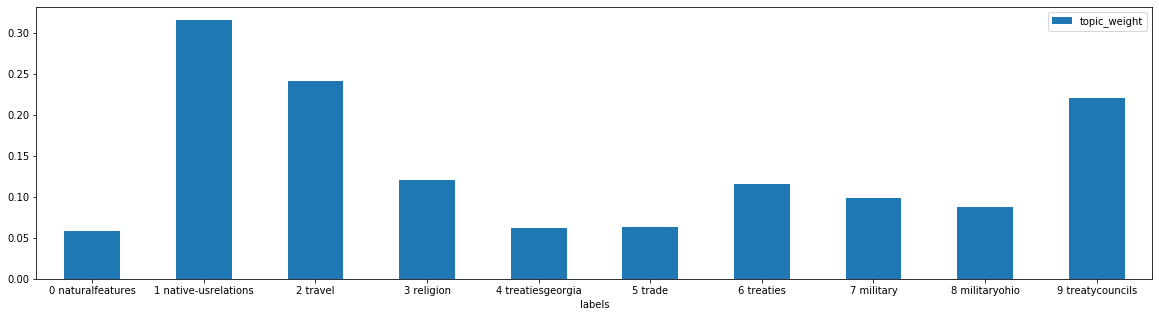

In [3]:
# Represent the weights of the topics as a simple bar chart, using the author-created topic labels. 

topic_bar = nv10_topics.plot.bar(x='labels', y='topic_weight', rot=0, figsize=(20,5))

In [6]:
# The mallet .txt doc-topics output file was converted to a csv, the document number and filepath columns 
# were deleted (in a copy of the original file), the number format was changed from scientific to decimal with 
# 6 places, and the labels from the previous step were added as column headers
# in advance of reading the csv into a pandas dataframe.

nv10_docs1 = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/10/nv10-docs1.csv", sep=',')

# Preview the data
nv10_docs1.head()

,'0 naturalfeatures','1 native-usrelations','2 travel','3 religion','4 treatiesgeorgia','5 trade','6 treaties','7 military','8 militaryohio','9 treatycouncils'
0,0.000249,0.078145,0.001029,0.017582,0.000262,0.000269,0.794064,0.000419,0.008909,0.099072
1,0.000017,0.096637,0.523779,0.025880,0.007445,0.000019,0.001520,0.015179,0.000026,0.329499
2,0.024739,0.172170,0.025449,0.015002,0.064423,0.024741,0.275215,0.174701,0.002306,0.221254
3,0.000099,0.022593,0.086940,0.000205,0.000104,0.000107,0.000196,0.000167,0.017116,0.872473
4,0.000001,0.110413,0.091540,0.000424,0.013554,0.002037,0.000002,0.726067,0.009300,0.046661


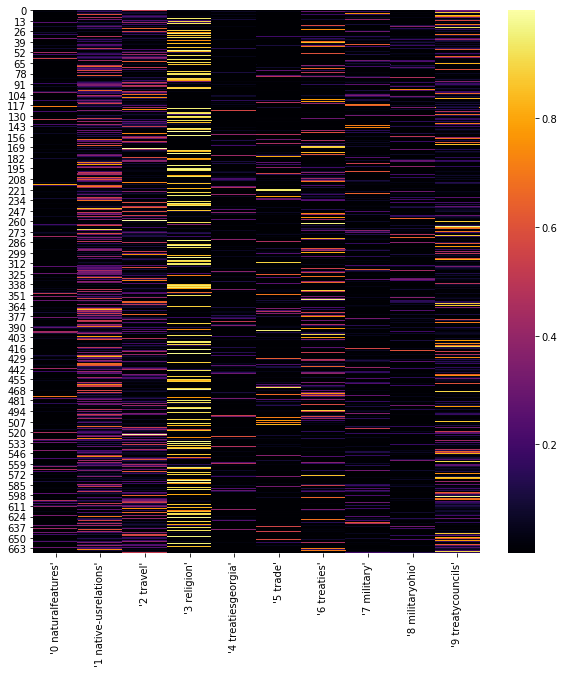

In [7]:
# Represent the topic weights in each document as a heatmap.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set standard figure size to 10 x 10 inches.
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# Set type to float to avoid unexexpected type error.
nv10_docs1 = nv10_docs1[nv10_docs1.columns].astype(float)  # or int

# Simpler code to create the default heatmap with the given figure size in line one above. Make it accessible
# by using the 'inferno' colormap. 

sns.heatmap(nv10_docs1, cmap='inferno')


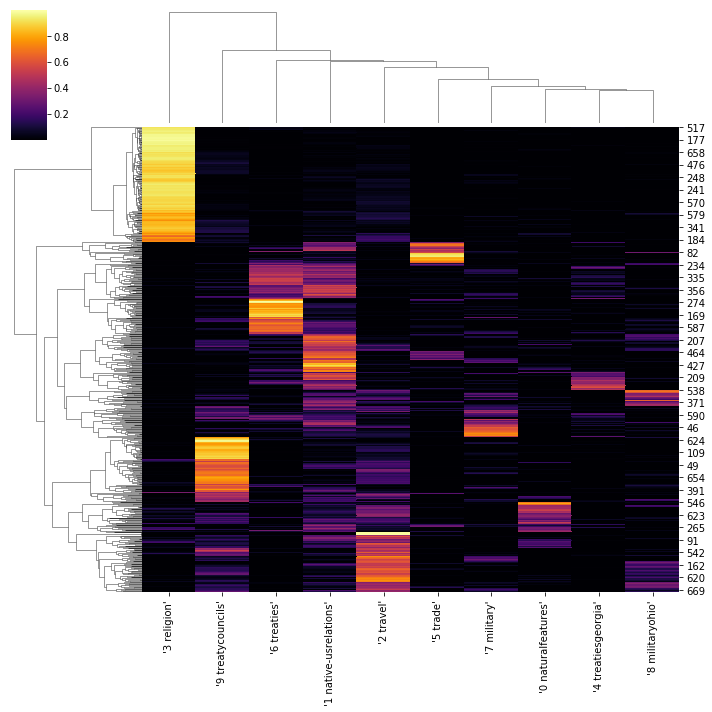

In [8]:
# Create a hierarchical heatmap using seaborn's "clustermap" method with default settings.
# By default this method will cluster by both rows and columns, which is what is most useful for this data.

sns.clustermap(nv10_docs1, cmap='inferno')

## Exploring the model in _pandas_


In [9]:
# In the duplicate csv file of the document-topic output, delete the first column (document number),
# and remove the first part of the filepath so you're left with the filename, and then remove the file
# extension (.txt).
# First we need to read in the csv file that still has the filenames:

nv10_docs = pd.read_csv("/Users/ritc/Desktop/DRC/NV/malletfiles/10/nv10-docs2.csv", sep=",")

nv10_docs.head()

,filename,'0 naturalfeatures','1 native-usrelations','2 travel','3 religion','4 treatiesgeorgia','5 trade','6 treaties','7 military','8 militaryohio','9 treatycouncils'
0,ASP-IA-v1-82.txt,0.000249,0.078145,0.001029,0.017582,0.000262,0.000269,0.794064,0.000419,0.008909,0.099072
1,ASP-IA-v1-82.txt,0.000017,0.096637,0.523779,0.025880,0.007445,0.000019,0.001520,0.015179,0.000026,0.329499
2,ASP-IA-v1-82.txt,0.024739,0.172170,0.025449,0.015002,0.064423,0.024741,0.275215,0.174701,0.002306,0.221254
3,ASP-IA-v1-82.txt,0.000099,0.022593,0.086940,0.000205,0.000104,0.000107,0.000196,0.000167,0.017116,0.872473
4,ASP-IA-v1-82.txt,0.000001,0.110413,0.091540,0.000424,0.013554,0.002037,0.000002,0.726067,0.009300,0.046661


In [10]:
# Use the sort_values() method to sort the dataframe by a topic of interest. 

nv10_docs_military = nv10_docs.sort_values("'2 travel'", ascending=False)

nv10_docs_military.head(10)

,filename,'0 naturalfeatures','1 native-usrelations','2 travel','3 religion','4 treatiesgeorgia','5 trade','6 treaties','7 military','8 militaryohio','9 treatycouncils'
566,ASP-IA-v1-82.txt,0.000105,0.000571,0.997936,0.000219,0.000111,0.000114,0.000208,0.000178,0.000159,0.000399
524,ASP-IA-v1-82.txt,0.000012,0.004937,0.994895,0.000025,0.000012,0.000013,0.000023,0.000020,0.000018,0.000045
260,ASP-IA-v1-82.txt,0.000219,0.009808,0.989814,0.000025,0.000013,0.000013,0.000024,0.000020,0.000018,0.000046
171,ASP-IA-v1-82.txt,0.000026,0.006016,0.989545,0.000055,0.000028,0.000028,0.000504,0.000496,0.000040,0.003262
123,ASP-IA-v1-82.txt,0.000184,0.010447,0.753793,0.000381,0.000194,0.000199,0.000363,0.000310,0.085348,0.148782
302,ASP-IA-v1-82.txt,0.000011,0.093774,0.751692,0.000024,0.006428,0.002345,0.000022,0.000019,0.107923,0.037761
615,ASP-IA-v1-82.txt,0.000311,0.001685,0.748420,0.000646,0.000328,0.000336,0.000615,0.192644,0.000470,0.054545
108,ASP-IA-v1-82.txt,0.000011,0.097241,0.744040,0.000024,0.000012,0.000012,0.000023,0.000019,0.113524,0.045092
213,ASP-IA-v1-82.txt,0.053066,0.009618,0.719520,0.048898,0.000032,0.000558,0.000061,0.000052,0.038379,0.129817
153,ASP-IA-v1-82.txt,0.060800,0.006487,0.717297,0.023573,0.008634,0.000036,0.000639,0.000056,0.118144,0.064333


I'm currently working on a way to create the corpus as JSON file, which *should* remove the problem of character limits. Then, we can read the JSON file into a pandas dataframe and merge that dataframe with the <b>docs</b> dataframe in order to view the content of each document within the dataframe, rather than having to toggle between a jupyter notebook, finder window, and the plain text files, but for now, the latter option is a workaround.

For our current exploration of the "military" topic, see the <a href="https://voyant-tools.org/?corpus=bdabc2797ab5226bfb1af925351d2ea5&panels=cirrus,reader,trends,summary,contexts">Voyant-Tools interface</a> that I have already pre-populated with the ten most closely related documents.